In [1]:
import numpy as np
import pandas as pd
import fine_tuning

### Training language and general setup

In [2]:
data_path = "../data/sentiment/"
task = "sentiment"
short_model_name = "xlm-roberta"
experiment = "tfm"
checkpoints_path = "E:/TFM_CCIL/checkpoints/"
use_class_weights = False
        
training_lang = fine_tuning.get_global_training_state(data_path, short_model_name, experiment, checkpoints_path)
trainer = fine_tuning.Trainer(training_lang, data_path, task, short_model_name, use_class_weights)

Training language:   Slovak 

Already trained:     Bulgarian  English

Not yet trained:     Croatian  Chinese  Vietnamese  Thai  Finnish  Basque  Korean  Arabic  Hebrew

Cannot train:      



### Model setup

In [3]:
# Model parameters
max_length = 512
batch_size = 4
learning_rate = 2e-5
epochs = 20

# Model creation
trainer.build_model(max_length, batch_size, learning_rate, epochs, num_labels=2, eval_batch_size=32)

# Checkpoint for best model weights
trainer.setup_checkpoint(checkpoints_path)

Some weights of the model checkpoint at jplu/tf-xlm-roberta-base were not used when initializing TFXLMRobertaForSequenceClassification: ['lm_head']
- This IS expected if you are initializing TFXLMRobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFXLMRobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of TFXLMRobertaForSequenceClassification were not initialized from the model checkpoint at jplu/tf-xlm-roberta-base and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Successfully built tf-xlm-roberta-base
Checkpoint file: E:/TFM_CCIL/checkpoints/sk/tf-xlm-roberta-base_sentiment_checkpoint_balancedclasses.hdf5
Temp weights file: E:/TFM_CCIL/checkpoints/sk/tf-xlm-roberta-base_temp.hdf5


### Data preparation

In [4]:
limit = None

trainer.prepare_data(limit=limit)

print("Train examples:", trainer.train_data.shape[0])
if trainer.use_class_weights:
    trainer.calc_class_weights()
    print(trainer.class_weights)

e:\anaconda\envs\tfm_ccil\lib\site-packages\tqdm\std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel



Train examples: 1092


### Training

Elapsed:                 1:34:23                  
Estimated remaining:     0:44:03                  



History:

Best dev score so far: 0.924

Epoch               Loss                Train score         Dev score           
0                   0.370               0.852               0.837               
1                   0.293               0.908               0.881               
2                   0.136               0.923               0.907               
3                   0.137               0.823               0.795               
4                   0.079               0.943               0.924               
5                   0.146               0.947               0.913               
6                   0.075               0.922               0.883               
7                   0.068               0.950               0.904               
8                   0.042               0.857               0.796               
9                   0.094               0.915               0.870               
10                  0.040               0.929               0.886   

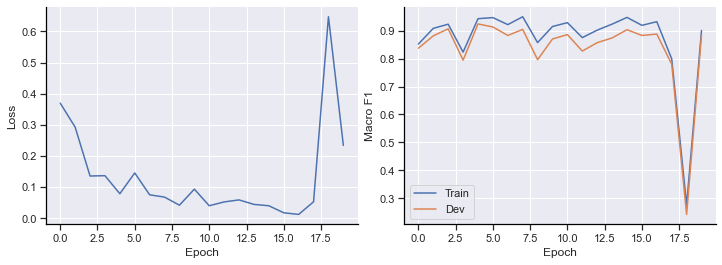


Epoch 20
218/273 [======================>.......] - ETA: 37s - loss: 0.1095

KeyboardInterrupt: 

In [5]:
trainer.setup_training()
trainer.train()

In [ ]:
trainer.make_definitive()